**Faire - Take home Assignment**

In [24]:
# Import libraries
import pandas as pd
import gspread
import os
import matplotlib.pyplot as plt
from google.cloud import bigquery # Imports the Google Cloud Client Library
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g

In [25]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='/Users/chaitanyapaga/Desktop/BQ-jupyter/analytics-bq.json'

In [26]:
# Initiates a client for Bigquery service
bigquery_client = bigquery.Client(project='analytics-projects-dec-2019')

In [27]:
# Configure the connection to google sheets
##scope = ['https://spreadsheets.google.com/feeds']
scope = ['https://www.googleapis.com/auth/spreadsheets']
# Path to the Service Account Credential json file 
credentials = ServiceAccountCredentials.from_json_keyfile_name('./analytics-bq.json',
                                                               scope
                                                              )
# Authorizing my Notebook
gc = gspread.authorize(credentials)

# The spreadsheet ID
spreadsheet_key = '1HtL3Tt33Hx1JXGerzQtaBKOekODnKAF-a25ade_-aAA'

In [28]:
# Query from bigquery (entire dataset)
Query = """select * 
from `analytics-projects-dec-2019.Faire.faire_dataset`
"""

In [29]:
# Running the query to get data from Bigquery
query_job = bigquery_client.query(Query)

In [30]:
# Converting the data in panda dataframe
df = query_job.to_dataframe()

In [31]:
# Analyze the data

In [32]:
# checking number of rows and columns 
df.shape

(218538, 21)

In [33]:
# checking colume datatypes
df.dtypes

brand_id                                                  int64
retailer_id                                              object
brand_relationship_id                                     int64
brand_relationship_created_at               datetime64[ns, UTC]
brand_relationship_confirmed_at                          object
confirmation_reason                                      object
normalized_referer                                       object
outgoing_email_id                                       float64
email_sent_at                               datetime64[ns, UTC]
brand_relationship_order_id                              object
retailer_signed_up_at                                    object
retailer_placed_first_order_at                           object
retailer_placed_first_confirmed_order_at                 object
power_retailer_converted_at                              object
retailer_gmv                                             object
retailer_business_type                  

In [34]:
# checking info on each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218538 entries, 0 to 218537
Data columns (total 21 columns):
brand_id                                    218538 non-null int64
retailer_id                                 32925 non-null object
brand_relationship_id                       218538 non-null int64
brand_relationship_created_at               218538 non-null datetime64[ns, UTC]
brand_relationship_confirmed_at             32924 non-null object
confirmation_reason                         32924 non-null object
normalized_referer                          18418 non-null object
outgoing_email_id                           59158 non-null float64
email_sent_at                               59158 non-null datetime64[ns, UTC]
brand_relationship_order_id                 420 non-null object
retailer_signed_up_at                       32925 non-null object
retailer_placed_first_order_at              16370 non-null object
retailer_placed_first_confirmed_order_at    14004 non-null object
power

In [35]:
# check for duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
218533    False
218534    False
218535    False
218536    False
218537    False
Length: 218538, dtype: bool

In [36]:
# number of rows per brand_id
df['brand_id'].value_counts()

8929     14732
11582     8964
19643     8086
6913      5404
4106      4975
         ...  
28344        1
45347        1
2997         1
16308        1
5437         1
Name: brand_id, Length: 2560, dtype: int64

In [37]:
# of rows per retailer_id
df['retailer_id'].value_counts()

91992.0     2
59056.0     2
115468.0    2
100690.0    2
112829.0    2
           ..
113554.0    1
113555.0    1
121704.0    1
113559.0    1
131072.0    1
Name: retailer_id, Length: 32873, dtype: int64

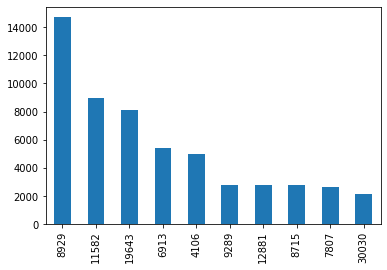

In [38]:
# top 10 brands
top10 = df["brand_id"].value_counts()
top10.sort_values(ascending=False)
top10 = top10[:10]
top10.plot(kind="bar")

In [69]:
# Query 1 
Query = """
Select a.retailer_id 
, cast(a.retailer_signed_up_at as date) as retailer_signed_up_date
, extract(year from cast(a.retailer_signed_up_at as timestamp)) as first_signed_up_year 
, extract(month from cast(a.retailer_signed_up_at as timestamp)) as first_signed_up_month 
,  date_add(cast(a.retailer_signed_up_at as date), interval if(extract(dayofweek from cast(a.retailer_signed_up_at as datetime))=1, -6 , -extract(dayofweek from cast(a.retailer_signed_up_at as datetime))+2) DAY) as sign_up_week_start_date

, extract(year from cast(a.retailer_placed_first_confirmed_order_at as timestamp)) as first_confired_order_year 
, extract(month from cast(a.retailer_placed_first_confirmed_order_at as timestamp)) as first_confired_order_month 
,  date_add(cast(a.retailer_placed_first_confirmed_order_at as date), interval if(extract(dayofweek from cast(a.retailer_placed_first_confirmed_order_at as datetime))=1, -6 , -extract(dayofweek from cast(a.retailer_placed_first_confirmed_order_at as datetime))+2) DAY) as confirmation_week_start_date

, date_diff( cast(a.retailer_placed_first_confirmed_order_at as date), cast(a.retailer_signed_up_at as date), day) as days_to_first_confirm_order_from_signup 
from `analytics-projects-dec-2019.Faire.faire_dataset` a
where 1=1
and extract(year from cast(a.retailer_placed_first_confirmed_order_at as timestamp)) IN ( 2018,2019)
group by 1,2,3,4,5,6,7,8,9
order by 6,7,8
"""



In [70]:
query_job = bigquery_client.query(Query)
df = query_job.to_dataframe()
df.head()

,retailer_id,retailer_signed_up_date,first_signed_up_year,first_signed_up_month,sign_up_week_start_date,first_confired_order_year,first_confired_order_month,confirmation_week_start_date,days_to_first_confirm_order_from_signup
0,34688,2018-04-19,2018,4,2018-04-16,2018,4,2018-04-16,0
1,36459,2018-04-28,2018,4,2018-04-23,2018,4,2018-04-23,0
2,36418,2018-04-28,2018,4,2018-04-23,2018,4,2018-04-23,0
3,36411,2018-04-28,2018,4,2018-04-23,2018,4,2018-04-23,0
4,36409,2018-04-28,2018,4,2018-04-23,2018,4,2018-04-23,0


In [71]:
# Setting the sheet name and the start cell where the upload data begins 
wks_name = 'Retailer'
#cell_of_start_df = 'A2'
# uploading the dataframe to sheets
d2g.upload(df,
           spreadsheet_key,
           wks_name,
           credentials=credentials,
           col_names=True,
           row_names=False,
           #start_cell = cell_of_start_df,
           clean=False)
print ('The sheet is updated successfully')

The sheet is updated successfully


In [74]:
# Query 2 
Query = """
with clicks as (Select a.brand_id 
, extract(year from cast(a.brand_relationship_created_at as timestamp)) as first_signed_up_year 
, extract(month from cast(a.brand_relationship_created_at as timestamp)) as first_signed_up_month 
,  date_add(cast(a.brand_relationship_created_at as date), interval if(extract(dayofweek from cast(a.brand_relationship_created_at as datetime))=1, -6 , -extract(dayofweek from cast(a.brand_relationship_created_at as datetime))+2) DAY) as week_start_date
, if(outgoing_email_id is not null, "Email link" , "Not Email link") as Retailer_Link
from `analytics-projects-dec-2019.Faire.faire_dataset` a
where 1=1
and a.retailer_id is null
and extract(year from cast(a.brand_relationship_created_at as timestamp)) IN ( 2018,2019)
order by 2,3,4)

select week_start_date
, count(Case when Retailer_Link = "Email link" Then brand_id end) as email_clicks
, count(Case when Retailer_Link = "Not Email link" Then brand_id end) as non_email_clicks
, count(brand_id) as total_clicks
from clicks
group by 1
order by 1
"""

query_job = bigquery_client.query(Query)
df = query_job.to_dataframe()
df.head()

,week_start_date,email_clicks,non_email_clicks,total_clicks
0,2018-04-09,0,1,1
1,2018-04-16,0,80,80
2,2018-04-23,0,139,139
3,2018-04-30,0,40,40
4,2018-05-07,0,16,16


In [75]:
# Setting the sheet name and the start cell where the upload data begins 
wks_name = 'Clicks'
# uploading the dataframe to sheets
d2g.upload(df,
           spreadsheet_key,
           wks_name,
           credentials=credentials,
           col_names=True,
           row_names=False,
           clean=False)
print ('The sheet is updated successfully')

The sheet is updated successfully


In [78]:
# Query 3 
Query = """
with brands_email as (Select a.brand_id 
, a.account_owner
, extract(year from cast(a.email_sent_at as timestamp)) as email_sent_at_year 
, extract(month from cast(a.email_sent_at as timestamp)) as email_sent_at_month 
,  date_add(cast(a.email_sent_at as date), interval if(extract(dayofweek from cast(a.email_sent_at as datetime))=1, -6 , -extract(dayofweek from cast(a.email_sent_at as datetime))+2) DAY) as week_start_date

from `analytics-projects-dec-2019.Faire.faire_dataset` a
where 1=1
and extract(year from cast(a.email_sent_at as timestamp)) IN ( 2018,2019)
order by 2,3,4)

select week_start_date
, count(distinct(case when account_owner = "Control" then brand_id end )) as unique_control_brands
, count(distinct(case when account_owner = "Enterprise Maker" then  brand_id end )) as unique_enterprise_brands
, count(distinct(case when account_owner = "Maker Success" then  brand_id end )) as unique_maker_brands
, count(distinct(case when account_owner = "Small maker or other" then  brand_id end )) as unique_small_brands
, count(distinct(brand_id)) as unique_brands
from brands_email
group by 1
order by 1
"""

query_job = bigquery_client.query(Query)
df = query_job.to_dataframe()
df.head()

,week_start_date,unique_control_brands,unique_enterprise_brands,unique_maker_brands,unique_small_brands,unique_brands
0,2018-06-11,1,0,2,0,3
1,2018-06-18,1,0,4,1,6
2,2018-06-25,1,1,5,4,11
3,2018-07-02,1,1,5,1,8
4,2018-07-09,0,1,16,3,20


In [79]:
# Setting the sheet name and the start cell where the upload data begins 
wks_name = 'Brands'
# uploading the dataframe to sheets
d2g.upload(df,
           spreadsheet_key,
           wks_name,
           credentials=credentials,
           col_names=True,
           row_names=False,
           clean=False)
print ('The sheet is updated successfully')

The sheet is updated successfully


In [67]:
# Query 4 
Query = """
with brands_adoption as (Select a.brand_id 
, a.account_owner
, extract(year from cast(a.brand_adopted_elevate_at as timestamp)) as adopted_elevate_at_year 
, extract(month from cast(a.brand_adopted_elevate_at as timestamp)) as adopted_elevate_at_month 
,  date_add(cast(a.brand_adopted_elevate_at as date), interval if(extract(dayofweek from cast(a.brand_adopted_elevate_at as datetime))=1, -6 , -extract(dayofweek from cast(a.brand_adopted_elevate_at as datetime))+2) DAY) as week_start_date

from `analytics-projects-dec-2019.Faire.faire_dataset` a
where 1=1
and extract(year from cast(a.brand_adopted_elevate_at as timestamp)) IN ( 2018,2019)
group by 1,2,3,4,5
order by 3,4,5)

select week_start_date
, account_owner
, count(distinct brand_id ) as unique_brnads
from brands_adoption
group by 1,2
order by 1,2
"""

query_job = bigquery_client.query(Query)
df = query_job.to_dataframe()
df.head()

,week_start_date,account_owner,unique_brnads
0,2018-04-16,Control,1
1,2018-04-16,Small maker or other,1
2,2018-04-23,Maker Success,1
3,2018-05-14,Maker Success,1
4,2018-05-14,Small maker or other,1


In [68]:
# Setting the sheet name and the start cell where the upload data begins 
wks_name = 'Elevate'
# uploading the dataframe to sheets
d2g.upload(df,
           spreadsheet_key,
           wks_name,
           credentials=credentials,
           col_names=True,
           row_names=False,
           clean=False)
print ('The sheet is updated successfully')

The sheet is updated successfully


In [ ]:
## The End